# Initial Data Exploration for Neighborhood Food Retail & Walkable Access to Healthy Food

### I aim to explore the inequality that restricts food access in Philadelphia 

 #### Neighborhood Food Retail Dataset was published August 26, 2019
> This dataset is derived from the Neighborhood Food Retail in
       Philadelphia report. The report and accompanying online 
       resource gallery look at neighborhood availability of "high-
       produce supply stores” (e.g., supermarkets, produce stores, 
       farmers’ markets) in relation to “low-produce supply 
       stores” (like dollar stores, pharmacies, and convenience 
       stores).
* https://www.opendataphilly.org/dataset/neighborhood-food-retail

#### Philadelphia Food Access Dataset was published January 19, 2016
> The version of this dataset contains only the city blocks 
       where there is low or no walkable access to healthy food and 
       high poverty.
* https://www.opendataphilly.org/dataset/philadelphia-food-access
       
       
 ### Data
 * A CSV file

## EDA NeighborhoodFoodRetail.csv

I imported my data and began to explore the shape and labels of the columns

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
nfr_df = pd.read_csv("../data/NeighborhoodFoodRetail.csv")

In [3]:
nfr_df.shape

(1336, 16)

There are 1336 rows and 16 columns

In [4]:
nfr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  1336 non-null   int64  
 1   GEOID10                   1336 non-null   int64  
 2   NON_RESIDENTIAL           1336 non-null   object 
 3   TOTAL_LPSS                1325 non-null   float64
 4   LPSS_PER1000              1325 non-null   float64
 5   TOTAL_HPSS                1325 non-null   float64
 6   HPSS_PER1000              1325 non-null   float64
 7   PCT_HPSS                  1325 non-null   float64
 8   HPSS_ACCESS               1325 non-null   object 
 9   SUPERMARKET_ACCESS        1325 non-null   object 
 10  PCT_VEHICLE_AVAILABILITY  1326 non-null   float64
 11  TOTAL_RESTAURANTS         1336 non-null   int64  
 12  PCT_POVERTY               1327 non-null   float64
 13  HIGH_POVERTY              1327 non-null   object 
 14  Shape__A

In [5]:
column_mapping = {"HIGH_POVERTY" : "high_poverty", "HPSS_ACCESS": "high_produce_access", 
                 "HPSS_PER1000" : "high_produce_stores_per_thousand", 
                  "LPSS_PER1000": "low_produce_stores_per_thousand", "NON_RESIDENTIAL" : "no_residents", 
                  "PCT_HPSS" : "percent_high_produce_stores_half_mile", "PCT_POVERTY" : "percentage_poverty", 
                  "PCT_VEHICLE_AVAILABILITY" : "percent_vehicle_available", "SUPERMARKET_ACCESS" : "supermarket_access", 
                 "TOTAL_HPSS" : "total_high_produce_stores_half_mile", "TOTAL_LPSS" : "total_low_produce_stores_half_mile", 
                 "TOTAL_RESTAURANTS" : "total_restaurants"}
nfr_df.rename(columns=column_mapping, inplace=True)

I chose to look closely at "Percentage Poverty" from all the columns above because it seems extremely relevant to my research and data analysis.

In [6]:
nfr_df[["percentage_poverty"]].describe()

,percentage_poverty
count,1327.000000
mean,26.520875
std,18.830053
min,0.000000
25%,11.043445
50%,22.905028
75%,39.300387
max,92.452830


The maximum percent of people in poverty is 92.45% for a given area

In [7]:
nfr_df[["high_poverty"]].describe()

,high_poverty
count,1327
unique,2
top,Yes
freq,740


Of the 1327 geolocations 740 of them are "yes" and therefore living in high poverty

In [8]:
(nfr_df["high_poverty"] == "Yes").sum()

740

740 geolocations living in high poverty is an extremely disheartening number

In [9]:
nfr_df.head()

,OBJECTID,GEOID10,no_residents,total_low_produce_stores_half_mile,low_produce_stores_per_thousand,total_high_produce_stores_half_mile,high_produce_stores_per_thousand,percent_high_produce_stores_half_mile,high_produce_access,supermarket_access,percent_vehicle_available,total_restaurants,percentage_poverty,high_poverty,Shape__Area,Shape__Length
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373
2,3,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466
3,4,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419
4,5,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591


Supermarket Access was another relevant column I decided to explore further, as supermarket access goes hand in hand with poverty and can lead to food insecurity if access is not available.

In [10]:
nfr_df[["supermarket_access"]].describe()

,supermarket_access
count,1325
unique,2
top,Yes
freq,1052


of the 1325 geolocations 1052 have supermarket acess

##### Histogram of percent poverty

In [11]:
#nfr_df.hist(column='percentage_poverty')
#plt.xlabel("percent poverty")
#plt.ylabel("number of geolocations")

This looks like a triangular distribution with parameter C located at 0

In [12]:
# I defined the list of cut points for the values you want to assign to ranges
cutpoints = range(0,101,10)

# and a corresponding list of labels for each range
labels = ["{}-{}%".format(i,i+9) for i in range(0,100,10)]

# then added a new column that is the result of using the pd.cut() function
nfr_df['percentage_poverty_range']=pd.cut(nfr_df['percentage_poverty'], bins=cutpoints, labels=labels)

nfr_df[['percentage_poverty', 'percentage_poverty_range']].head(10)

,percentage_poverty,percentage_poverty_range
0,54.969325,50-59%
1,37.860082,30-39%
2,57.212714,50-59%
3,19.480519,10-19%
4,52.134146,50-59%
5,80.952381,80-89%
6,55.660377,50-59%
7,8.139535,0-9%
8,15.879017,10-19%
9,57.761733,50-59%


In [13]:
poverty_dist_series = nfr_df['percentage_poverty_range'].value_counts().sort_index()

In [14]:
type(poverty_dist_series)
poverty_dist_df = pd.DataFrame({'poverty_range':poverty_dist_series.index, 'ct':poverty_dist_series.values})

In [15]:
poverty_dist_df

,poverty_range,ct
0,0-9%,276
1,10-19%,289
2,20-29%,245
3,30-39%,179
4,40-49%,147
5,50-59%,89
6,60-69%,52
7,70-79%,17
8,80-89%,10
9,90-99%,1


Text(0, 0.5, 'number of geolocations')

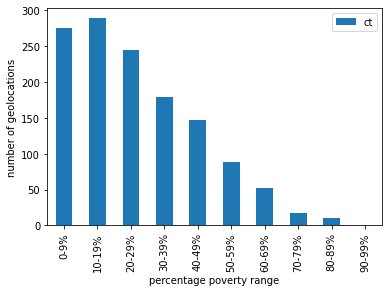

In [16]:
poverty_dist_df.plot.bar(x='poverty_range', y='ct')
plt.xlabel("percentage poverty range")
plt.ylabel("number of geolocations")

This histogram shows percentage of poverty with number of geolocations that have residents falling in that poverty percentage. Most geolocations have a 10-19% poverty level, which by the numbers seems good but that means one or two in every ten families are living in poverty and are likely unable to feed or properly care for their children.

## EDA Walkable_Access_Healthy_Food.csv

Walkable Access to healthy food was an important data set because many people in Philadelphia do not have personal vehicles and rely on walking or public transportation.

In [17]:
wahf_df = pd.read_csv("../data/Walkable_Access_Healthy_Food.csv")

In [18]:
wahf_df.shape

(18872, 5)

There are 5 columns and 18872 rows

In [19]:
wahf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18872 entries, 0 to 18871
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       18872 non-null  int64  
 1   GEOID          18872 non-null  int64  
 2   ACCESS_        18872 non-null  object 
 3   Shape__Area    18872 non-null  float64
 4   Shape__Length  18872 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 737.3+ KB


In [20]:
wahf_df.head()

,OBJECTID,GEOID,ACCESS_,Shape__Area,Shape__Length
0,1,421010378001037,No Access,2.117942e+06,8830.039023
1,2,421019800001053,No Access,5.803100e+06,9418.832796
2,3,421019800001164,No Access,5.994356e+05,9793.030362
3,4,421010369002011,No Access,1.186508e+06,6529.555121
4,5,421010170001005,No Access,2.291195e+06,7011.517275


the "Access" columns seemed most important to my data analysis so I chose to explore it further

In [21]:
wahf_df["ACCESS_"].describe()

count           18872
unique              4
top       High Access
freq             8036
Name: ACCESS_, dtype: object

In [22]:
wahf_df["ACCESS_"].value_counts()

High Access        8036
Low Access         4752
No Access          4033
Moderate Access    2051
Name: ACCESS_, dtype: int64

 * The most important statistic for my research is that 4033 geolocations have no access to healthy markets
 * It is important to note few locations have "Moderate Access" -- only 2051 out of 18872
 * The results are very polarized with most having either high or low/no access

Text(0, 0.5, 'number of geolocations')

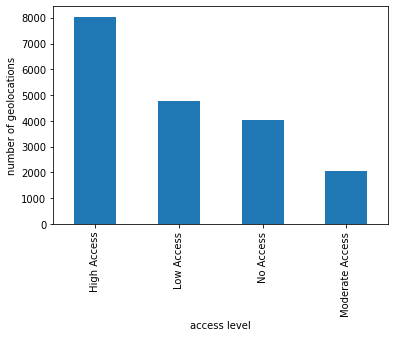

In [23]:
wahf_df["ACCESS_"].value_counts().plot.bar()
plt.xlabel("access level")
plt.ylabel("number of geolocations")

It is important to note that this access is by physical location, and not other factors such as affordability. Someone may live near a healthy market, but not be able to afford to buy food there.

In [24]:
access_percent = wahf_df['ACCESS_'].value_counts()  / wahf_df.shape[0] * 100
access_percent

High Access        42.581602
Low Access         25.180161
No Access          21.370284
Moderate Access    10.867953
Name: ACCESS_, dtype: float64

With 21.37% of Philadelphia residents with No Access to healthy food it is clear that change needs to be made. We must come together as people, communities, organizations, and government to create institutional change that will make the lives of those around us better.